# Predicting heart disease using machine learning
This notebook looks into various python based machine learning and data science libraries in an attempt to build a machine
learning model capable of predicting whether or not someone has heart disease on their medical attributes.

## We are going to take following approach:-

### 1.Problem definition:- 

> Cinical parameters about a patient, can we prdict whether or not they have heart disease?

### 2.Data:-

> The original date came from the cleveland data from the UCI machine learning Repository.

### 3.Evaluation:-

> If we can reach 95% accuract at predicting whether or not a patient has heart disease during the proof of concept,
we will pursue the project.
Datalink:-https://www.kaggle.com/ronitf/heart-disease-uci

### 4. Features:-

**Create Data Dictionary**
* age age in years
* sex(1 = male; 0 = female)
* cpchest pain type
* trestbpsresting blood pressure (in mm Hg on admission to the hospital)
* cholserum cholestoral in mg/dl
* fbs(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecgresting electrocardiographic results
* thalachmaximum heart rate achieved
* exangexercise induced angina (1 = yes; 0 = no)
* oldpeakST depression induced by exercise relative to rest
* slopethe slope of the peak exercise ST segment
* canumber of major vessels (0-3) colored by flourosopy
* thal3 = normal; 6 = fixed defect; 7 = reversable defect
* target1 or 0


## Preparing the tools

We are Going to use Pandas,Matplotlib and NumPy for data analysis and manipulation

In [1]:
# Import all the tools we need

# Regular EDA(exploratory data analysis) and plotting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the noteboook
%matplotlib inline 

# Models from Scikit-learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [2]:
df=pd.read_csv("heart-disease.csv")
df.shape
#(row, columns)


(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The Goal here is to find more about the data and become a subject matter expert on the dataser you are working with.
* What question(s) are you trying to solve?
* What kind of data do we have and how do we treat different types?
* What is missing from data and how do you deal with it?
* Where are the outliers and why should you care about it?
* How can you add,change or remove the features to get more out of your data?

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [14]:
#Let's find out how many of each class there

df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

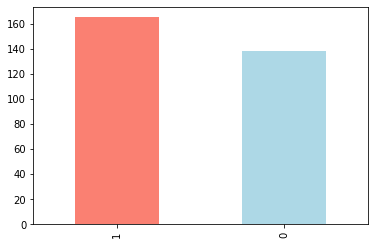

In [17]:
df["target"].value_counts().plot(kind='bar',color=["salmon","lightblue"]);

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [19]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [20]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to sex

In [21]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [22]:
# Compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


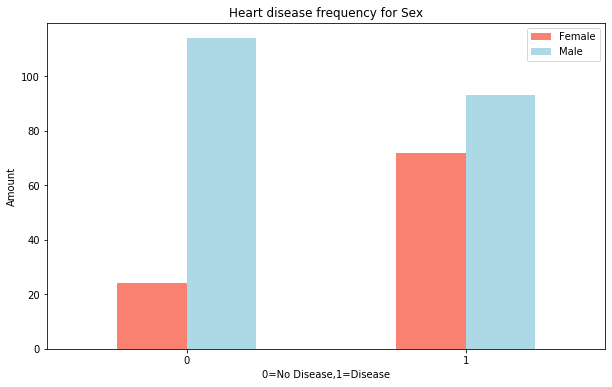

In [5]:
# Create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  figsize=[10,6],
                                  color=["salmon","lightblue"]);

plt.title("Heart disease frequency for Sex")
plt.xlabel("0=No Disease,1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

## Age vs. Max Heart Rate for heart Disease

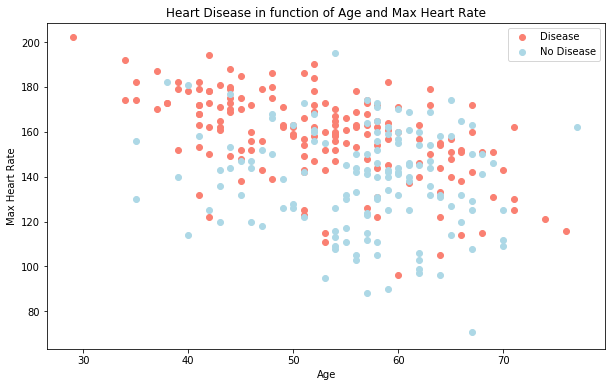

In [6]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color="salmon");

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color="lightblue");

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);


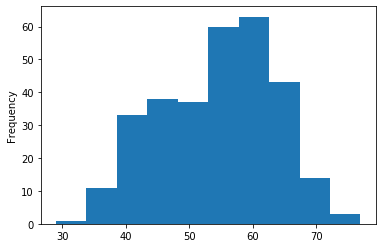

In [62]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

## Heart Disease Frequency per Chest Pain Type
* 0:Typical angina:chest pain related,decrease blood supply to heart
* 1:Atypical angina:chest pain not related to heart 
* 2:Non anginal pain:typically esophaegal spasms (not heart related)
* 3:Asymptomatic:chest pain not showing signs of disease

In [68]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


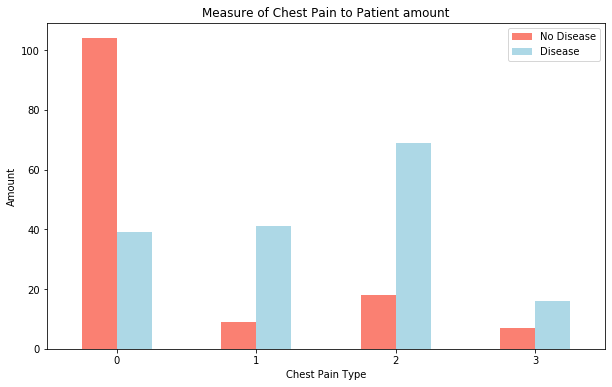

In [9]:
# Make the crosstab more visual
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                 figsize=(10,6),
                                 color=("salmon","lightblue"));

# Add some communication
plt.title("Measure of Chest Pain to Patient amount")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

In [10]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


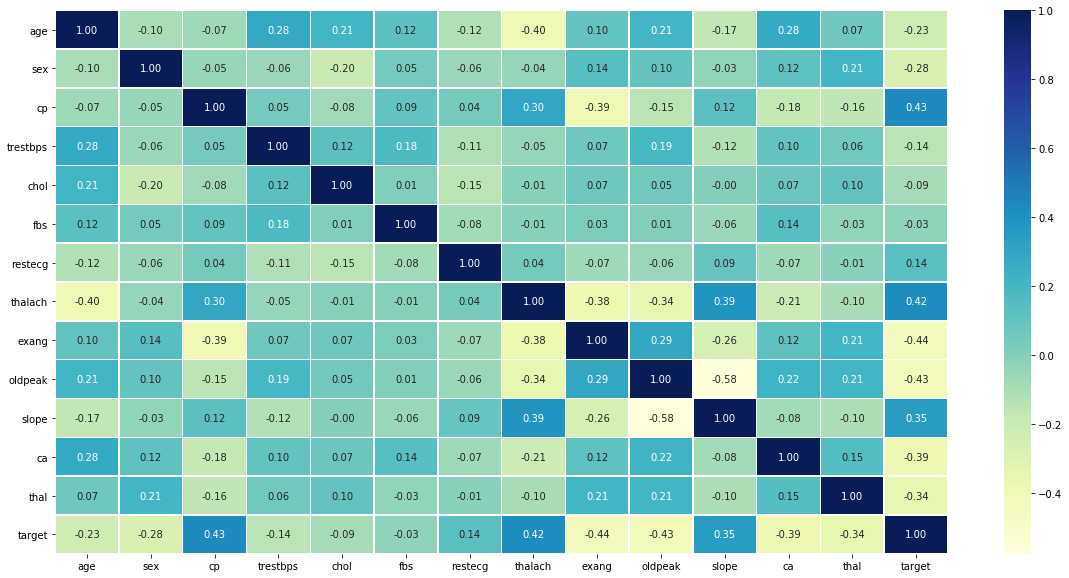

In [19]:
# Let's Make our correlation matrix a little prettier
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(20,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt="0.2f",
               cmap="YlGnBu");

# 5.Modelling

In [3]:
# Split data into X and y

x=df.drop("target",axis=1)
y=df["target"]

In [4]:
# Split data into train and test sets
np.random.seed(10)

# Split into Train and Test set
x_train,x_test,y_train,y_test=train_test_split(x,
                                              y,
                                              test_size=0.2)

Now we got our data split into training and test sets,it's time to build a machine learning model.
We will train it(find the patterns) on the training set.
And we will test it(use the patterns) on the test set.

We are going to try 3 Different machine learning models:
* 1.Logistic Regression
* 2.K-nearest neigbours Classifier
* 3.Random Forest Classifier

In [5]:
# Put models in a dictionary
models={"Logistic Regression": LogisticRegression(),
        "KNeighbors Classifier":KNeighborsClassifier(),
        "Random Forest Classifier":RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different sci-kit learn machine learning models
    x_train:testing data(no labels)
    x_test:testing data(no labels)
    y_train:training labels
    y_test:test labels
    """
    #set random seed
    np.random.seed(10)
    # Make a dictionary to keep model scores
    model_scores={}
    # Loop through models
    for name,model in models.items():
        # Fit the model to the data
        model.fit(x_train,y_train)
        # Evauluate the model and append its score to mode;_scores
        model_scores[name]=model.score(x_test,y_test)
    return model_scores

In [6]:
model_scores=fit_and_score(models,
                          x_train,
                          x_test,
                          y_train,
                          y_test)
model_scores


C:\Users\RAJENDRA\Desktop\project\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7704918032786885,
 'KNeighbors Classifier': 0.5901639344262295,
 'Random Forest Classifier': 0.8032786885245902}

### Model Comparison

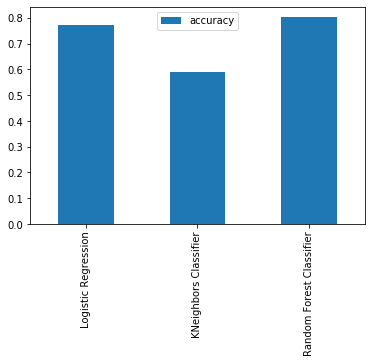

In [7]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

Now we have got baseline model... and we know a models first prediction arent always what we should based our next steps off.
what should do?

Lets look at the following:
* Hyperparameter tuning
* Feature importance
* confusion matrix
* cross validation
* precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve(AUC)

## Hyperparameter tuning

In [8]:
#Let's tune KNN

train_scores=[]
test_scores=[]

# Create a list of different values for n_neighbors
neighbors=range(1,21)

# Setup KNN instance
knn=KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(x_train,y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(x_train,y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(x_test,y_test))
    

In [51]:
train_scores

[1.0,
 0.8181818181818182,
 0.8099173553719008,
 0.7644628099173554,
 0.78099173553719,
 0.7520661157024794,
 0.7396694214876033,
 0.7520661157024794,
 0.7355371900826446,
 0.7231404958677686,
 0.7066115702479339,
 0.7231404958677686,
 0.7107438016528925,
 0.7024793388429752,
 0.7024793388429752,
 0.6983471074380165,
 0.7066115702479339,
 0.6859504132231405,
 0.731404958677686,
 0.731404958677686]

In [52]:
test_scores

[0.5901639344262295,
 0.6557377049180327,
 0.5737704918032787,
 0.639344262295082,
 0.5901639344262295,
 0.7377049180327869,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.639344262295082,
 0.6721311475409836,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853]

Maximum KNN score on the test data:73.77


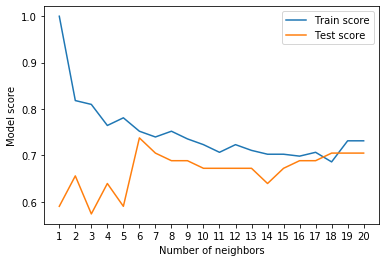

In [9]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data:{max(test_scores)*100:.2f}")

## Hyperparamater tuning with RandomizedSearchCV

We are going to tune:
* Logistic Regression()
* Random Forest Classifier()

... Using RandomizedSearchCV

In [10]:
# Create a hyperparamater grid for LogisticRegression
logistic_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}

# Create a hyperparamater grid for RandomForestClassifiers
rf_grid={"n_estimators":np.arange(10,1000,50),
        "max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}

Now we have got hyperparameter grids setup for each of our models,Let's tune them using RandomizedSearchCV

In [11]:
# Tune Logistic Regression model

np.random.seed(12)

# Setup random hyperparamater search for Logistic Regression
rs_log_reg= RandomizedSearchCV(LogisticRegression(),
                              param_distributions=logistic_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)

# Fit the random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [12]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [13]:
rs_log_reg.score(x_test,y_test)

0.7704918032786885

Now we have tuned LogisticRefression(),lets do the same for RandomForestClassifier()....

In [14]:
# Tune RandomForestClassifier model

np.random.seed(12)

# Setup random hyperparamater search for RandomForestClassifier
rs_rf= RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions=rf_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)

# Fit the random hyperparameter search model for LogisticRegression
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [15]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 410,
 'min_samples_split': 6,
 'min_samples_leaf': 13,
 'max_depth': 10}

In [16]:
# Evaluate the randomized search RandomForestClassifier Model
rs_rf.score(x_test,y_test)

0.819672131147541

## Hyperparameter Tuning with GridSearchCV
We will try to improve models again using GridSearch CV

In [20]:
# Different Hyperparamaters for our LogisticRegression model
log_reg_grid={"C":np.logspace(-4,4,30),
             "solver":["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)

# Fit grid hyperparamter Search model
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [21]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [22]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(x_test,y_test)

0.7704918032786885

In [24]:
model_scores

{'Logistic Regression': 0.7704918032786885,
 'KNeighbors Classifier': 0.5901639344262295,
 'Random Forest Classifier': 0.8032786885245902}

## Evaluating our tuned machine learning classifier ,beyond accuracy
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precisiom
* Recall
* F1-score

... and it would be great if cross0v-validation was used where possible.

To make comparisons and evaulate our traind model,first we need to make predictions.

In [27]:
# Make predictions with tuned model
y_preds=gs_log_reg.predict(x_test)

In [28]:
y_preds

array([0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [32]:
y_test

246    0
183    0
229    0
126    1
184    0
      ..
277    0
121    1
187    0
301    0
283    0
Name: target, Length: 61, dtype: int64

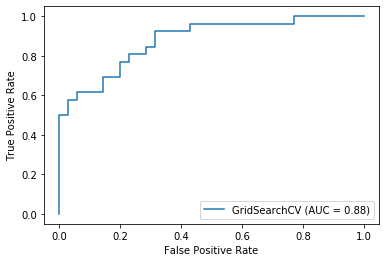

In [37]:
# Plot ROC curve and and calculate AUC metric
plot_roc_curve(gs_log_reg,x_test,y_test);

In [38]:
# Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[26  9]
 [ 5 21]]


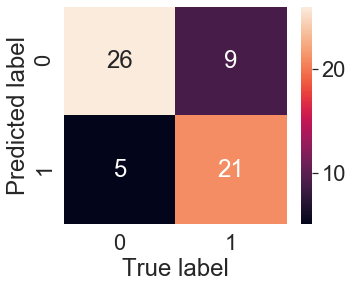

In [46]:
sns.set(font_scale=2)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig,ax=plt.subplots(figsize=(5,4))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=True)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test,y_preds)

Now Let's get a classification report as well as cross-validated precision,recall and F1 score.

In [48]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79        35
           1       0.70      0.81      0.75        26

    accuracy                           0.77        61
   macro avg       0.77      0.78      0.77        61
weighted avg       0.78      0.77      0.77        61



## Calculate evaluation metrix usong cross-validation
We are going to calculate accuracy,precision,recall and f1-score of our model using cross-validation and to do so we will be using cross_val_score().

In [49]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [52]:
# Create a new classifier with best parameters
clf=LogisticRegression(C= 0.20433597178569418,
                       solver= 'liblinear')

In [59]:
# Cross-validated accuracy
cv_acc=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [62]:
# Cross-validated precision
cv_precision=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8207936507936507

In [65]:
# Cross-validated recall
cv_recall=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [68]:
# Cross-validated f1-score
cv_f1=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="f1")
cv_f1=np.mean(cv_acc)
cv_f1

0.8446994535519124

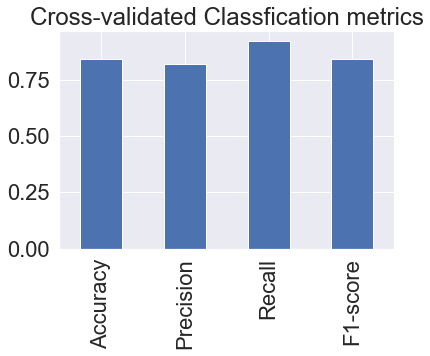

In [83]:
# Visualize cross-validated metrics
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                        "Precision":cv_precision,
                         "Recall":cv_recall,
                        "F1-score":cv_f1},
                       index=[0])
cv_metrics.T.plot.bar(title="Cross-validated Classfication metrics",
                   legend=False);

## Feature importance

Feature importance is another as asking,
"Which features contributed most to the outcome of the model and how did they contribute?"

Finding feature importance is different for each machine learning model.One way to find feature imprtance is to search for"(Model name) feature importance

Let's find the feature importance for our LogisticRegression model...

In [86]:
# Fit an instance of LogisticRegression
gs_log_reg.best_params_

clf=LogisticRegression(C= 0.20433597178569418,
                       solver= 'liblinear')

clf.fit(x_train,y_train);

In [87]:
# CHheck coef_
clf.coef_

array([[ 0.00715374, -0.97803189,  0.68014109, -0.01801809, -0.00464557,
        -0.05042029,  0.17402867,  0.03092578, -0.48188292, -0.32960515,
         0.43133354, -0.78562598, -0.42131799]])

In [95]:
# Match coef's of features to columns
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0071537378052905646,
 'sex': -0.9780318942637989,
 'cp': 0.6801410906588624,
 'trestbps': -0.01801808938012013,
 'chol': -0.004645572500204101,
 'fbs': -0.05042028972834347,
 'restecg': 0.17402867172403524,
 'thalach': 0.03092577662921307,
 'exang': -0.4818829235394782,
 'oldpeak': -0.3296051501679269,
 'slope': 0.43133354344504826,
 'ca': -0.7856259755806435,
 'thal': -0.42131799110167967}

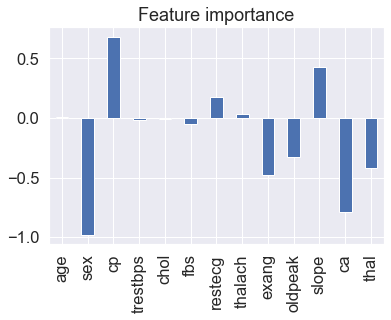

In [102]:
# Visualize feature importance
sns.set(font_scale=1.5)
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature importance",legend=False);